<h1>HW of XIAO JINGZE</h1>

Epoch 1/100


C:\Users\Administrator\2024_nus_Financial AI\ML\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 1s - 11ms/step - loss: 0.0331
Epoch 2/100
92/92 - 0s - 893us/step - loss: 0.0135
Epoch 3/100
92/92 - 0s - 894us/step - loss: 0.0110
Epoch 4/100
92/92 - 0s - 948us/step - loss: 0.0097
Epoch 5/100
92/92 - 0s - 860us/step - loss: 0.0084
Epoch 6/100
92/92 - 0s - 854us/step - loss: 0.0072
Epoch 7/100
92/92 - 0s - 830us/step - loss: 0.0062
Epoch 8/100
92/92 - 0s - 864us/step - loss: 0.0054
Epoch 9/100
92/92 - 0s - 841us/step - loss: 0.0048
Epoch 10/100
92/92 - 0s - 866us/step - loss: 0.0044
Epoch 11/100
92/92 - 0s - 848us/step - loss: 0.0041
Epoch 12/100
92/92 - 0s - 855us/step - loss: 0.0039
Epoch 13/100
92/92 - 0s - 811us/step - loss: 0.0038
Epoch 14/100
92/92 - 0s - 821us/step - loss: 0.0038
Epoch 15/100
92/92 - 0s - 812us/step - loss: 0.0037
Epoch 16/100
92/92 - 0s - 870us/step - loss: 0.0037
Epoch 17/100
92/92 - 0s - 876us/step - loss: 0.0037
Epoch 18/100
92/92 - 0s - 852us/step - loss: 0.0037
Epoch 19/100
92/92 - 0s - 822us/step - loss: 0.0037
Epoch 20/100
92/92 - 0s - 826us/st

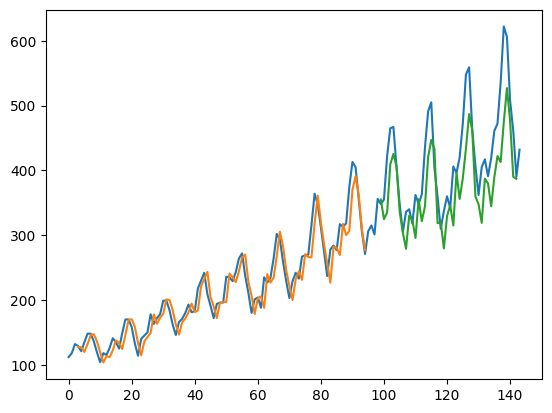

In [3]:
# LSTM用于国际航空公司乘客问题
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 将值数组转换为数据集矩阵
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# 固定随机种子以便复现
tf.random.set_seed(7)

# 加载数据集
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# 规范化数据集
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 分割为训练集和测试集
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 重新整形为 X=t 和 Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# 将输入重新整形为 [样本数, 时间步长, 特征数]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# 创建并拟合LSTM网
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# 进行预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 反转预测结果
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 计算均方根误差
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('训练集得分: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('测试集得分: %.2f RMSE' % (testScore))

# 将训练集预测结果移位以便绘图
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 将测试集预测结果移位以便绘图
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# 绘制基线和预测结果
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
